In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There is no null data :-) that's good day

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
cols = ['sex', 'smoker', 'region']
for i in cols:
    le.fit(data[i].drop_duplicates())
    data[i] = le.transform(data[i])

In [8]:
data.region.value_counts()

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

In [11]:
np.round(data.describe(), 1)

,age,sex,bmi,children,smoker,region,charges
count,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0,1338.0
mean,39.2,0.5,30.7,1.1,0.2,1.5,13270.4
std,14.0,0.5,6.1,1.2,0.4,1.1,12110.0
min,18.0,0.0,16.0,0.0,0.0,0.0,1121.9
25%,27.0,0.0,26.3,0.0,0.0,1.0,4740.3
50%,39.0,1.0,30.4,1.0,0.0,2.0,9382.0
75%,51.0,1.0,34.7,2.0,0.0,2.0,16639.9
max,64.0,1.0,53.1,5.0,1.0,3.0,63770.4


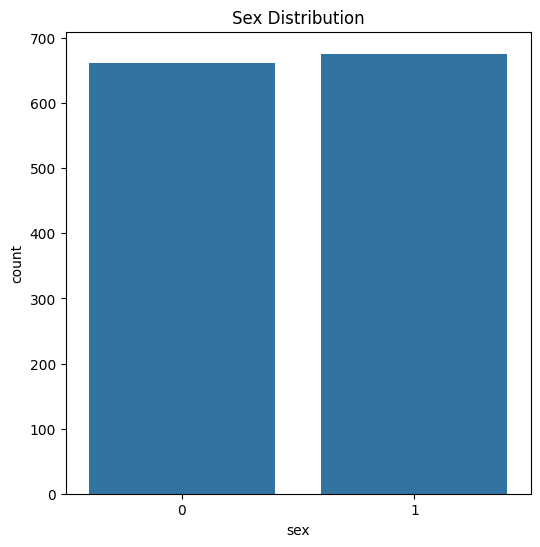

In [12]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'sex', data = data)
plt.title('Sex Distribution')
plt.show()

In [13]:
data['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

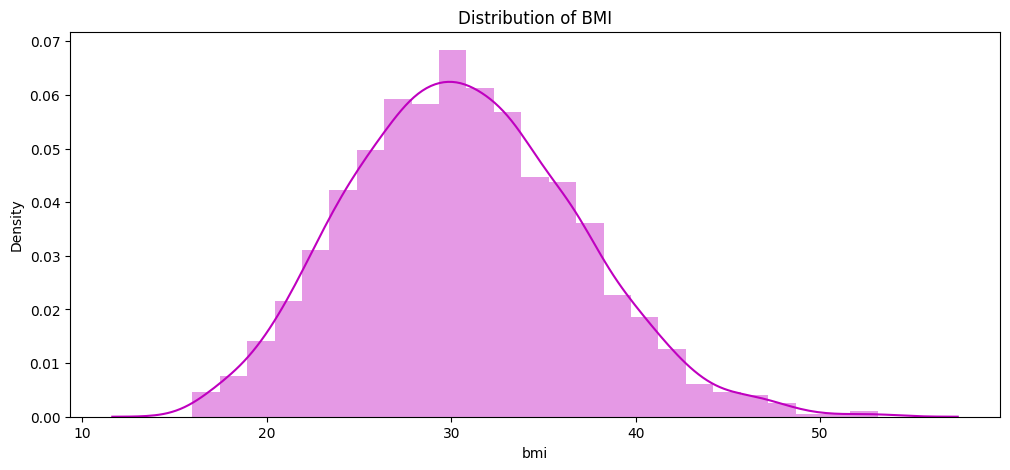

In [14]:
plt.figure(figsize=(12, 5))
plt.title("Distribution of BMI")
ax = sns.distplot(data['bmi'], color='m')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

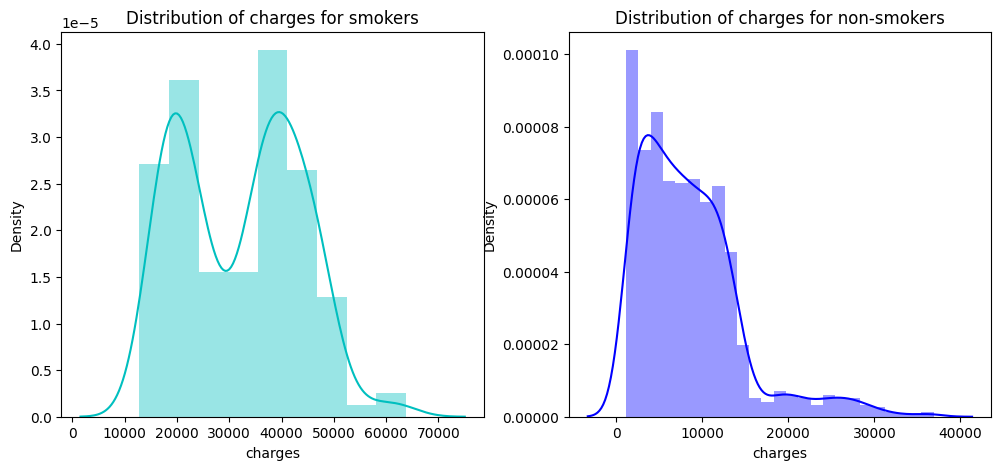

In [15]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax = fig.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'], color='b', ax=ax)
ax.set_title('Distribution of charges for non-smokers')

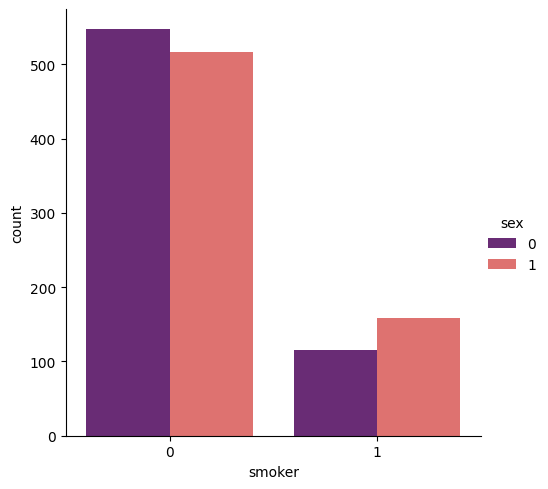

In [16]:
sns.catplot(x='smoker', kind='count', hue='sex', palette="magma", data=data)
# 0 -> male
# 1 -> female

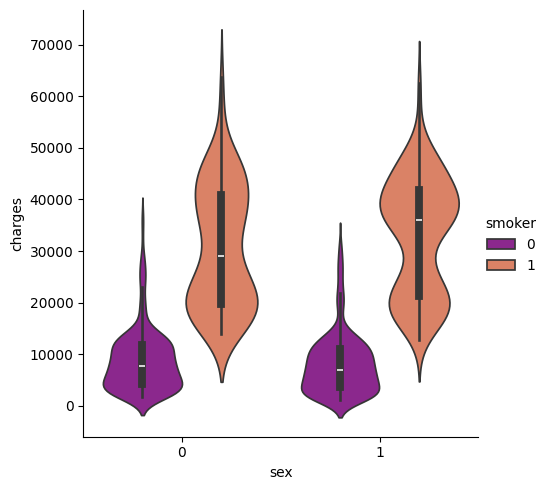

In [17]:
sns.catplot(x='sex', y='charges', hue='smoker', kind='violin', data=data, palette='plasma')

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [19]:
X = data.iloc[:, :-1]
y = data.charges

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score

print(f"R Squared Value: {r2_score(y_test, y_pred)}")

R Squared Value: 0.7911113876316934


## :-)